Activity 6

1)X-y split.

2)Normalize (numerical).

3)One Hot/Label Encoding (categorical).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
## to make it possible to display multiple output inside one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
vehicles_df= pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv") ## Your Code here

vehicles_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
vehicles_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
X=vehicles_df.drop('Total Claim Amount', axis=1)
y=vehicles_df['Total Claim Amount']

In [6]:
X=X._get_numeric_data()
X

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0,4809.216960,48029,61,7.0,52,0.0,9
1,1,2228.525238,0,64,3.0,26,0.0,1
2,2,14947.917300,22139,100,34.0,31,0.0,2
3,3,22332.439460,49078,97,10.0,3,0.0,2
4,4,9025.067525,23675,117,NaN,31,NaN,7
...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7
10906,10906,5259.444853,61146,65,7.0,68,0.0,6
10907,10907,23893.304100,39837,201,11.0,63,0.0,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6


In [7]:
categoricals_features= vehicles_df.select_dtypes("object")
categoricals_features

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [8]:
vehicles_df.State.value_counts()
vehicles_df.Response.value_counts()
vehicles_df.Coverage.value_counts()
vehicles_df.Education.value_counts()
vehicles_df["EmploymentStatus"].value_counts()
vehicles_df.Gender.value_counts()
vehicles_df["Location Code"].value_counts()
vehicles_df["Marital Status"].value_counts()
vehicles_df["Policy Type"].value_counts()
vehicles_df.Policy.value_counts()
vehicles_df["Renew Offer Type"].value_counts()
vehicles_df["Sales Channel"].value_counts()
vehicles_df["Vehicle Class"].value_counts()
vehicles_df["Vehicle Size"].value_counts()
vehicles_df["Vehicle Type"].value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: State, dtype: int64

No     8813
Yes    1466
Name: Response, dtype: int64

Basic       6660
Extended    3265
Premium      985
Name: Coverage, dtype: int64

Bachelor                3272
College                 3204
High School or Below    3146
Master                   887
Doctor                   401
Name: Education, dtype: int64

Employed         6789
Unemployed       2787
Medical Leave     504
Disabled          499
Retired           331
Name: EmploymentStatus, dtype: int64

F    5573
M    5337
Name: Gender, dtype: int64

Suburban    6902
Rural       2116
Urban       1892
Name: Location Code, dtype: int64

Married     6319
Single      2958
Divorced    1633
Name: Marital Status, dtype: int64

Personal Auto     8128
Corporate Auto    2341
Special Auto       441
Name: Policy Type, dtype: int64

Personal L3     4118
Personal L2     2537
Personal L1     1473
Corporate L3    1221
Corporate L2     688
Corporate L1     432
Special L2       193
Special L3       170
Special L1        78
Name: Policy, dtype: int64

Offer1    4483
Offer2    3490
Offer3    1732
Offer4    1205
Name: Renew Offer Type, dtype: int64

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: Sales Channel, dtype: int64

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

Medsize    7251
Small      1966
Large      1071
Name: Vehicle Size, dtype: int64

A    5428
Name: Vehicle Type, dtype: int64

In [9]:
categorical_cols=pd.get_dummies(categoricals_features["State"])

In [10]:
categorical_cols=pd.get_dummies(categoricals_features["Response"])

In [11]:
categorical_cols=pd.get_dummies(categoricals_features["Coverage"])

In [12]:
categorical_cols=pd.get_dummies(categoricals_features["Education"])

In [13]:
categorical_cols=pd.get_dummies(categoricals_features["EmploymentStatus"])

In [14]:
categorical_cols=pd.get_dummies(categoricals_features["Gender"],drop_first=True)

In [15]:
categorical_cols=pd.get_dummies(categoricals_features["Location Code"])

In [16]:
categorical_cols=pd.get_dummies(categoricals_features["Marital Status"])

In [17]:
categorical_cols=pd.get_dummies(categoricals_features["Policy Type"])

In [18]:
categorical_cols=pd.get_dummies(categoricals_features["Renew Offer Type"])

In [19]:
categorical_cols=pd.get_dummies(categoricals_features["Sales Channel"])

In [20]:
categorical_cols=pd.get_dummies(categoricals_features["Vehicle Class"])

In [21]:
categorical_cols=pd.get_dummies(categoricals_features["Vehicle Size"])

In [22]:
categorical_cols=pd.get_dummies(categoricals_features["Vehicle Type"])

In [23]:
X=X._get_numeric_data()
X

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0,4809.216960,48029,61,7.0,52,0.0,9
1,1,2228.525238,0,64,3.0,26,0.0,1
2,2,14947.917300,22139,100,34.0,31,0.0,2
3,3,22332.439460,49078,97,10.0,3,0.0,2
4,4,9025.067525,23675,117,NaN,31,NaN,7
...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7
10906,10906,5259.444853,61146,65,7.0,68,0.0,6
10907,10907,23893.304100,39837,201,11.0,63,0.0,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6


In [ ]:
drop_column

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Monthly Premium Auto'}>,
        <AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>],
       [<AxesSubplot:title={'center':'Number of Open Complaints'}>,
        <AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:>]], dtype=object)

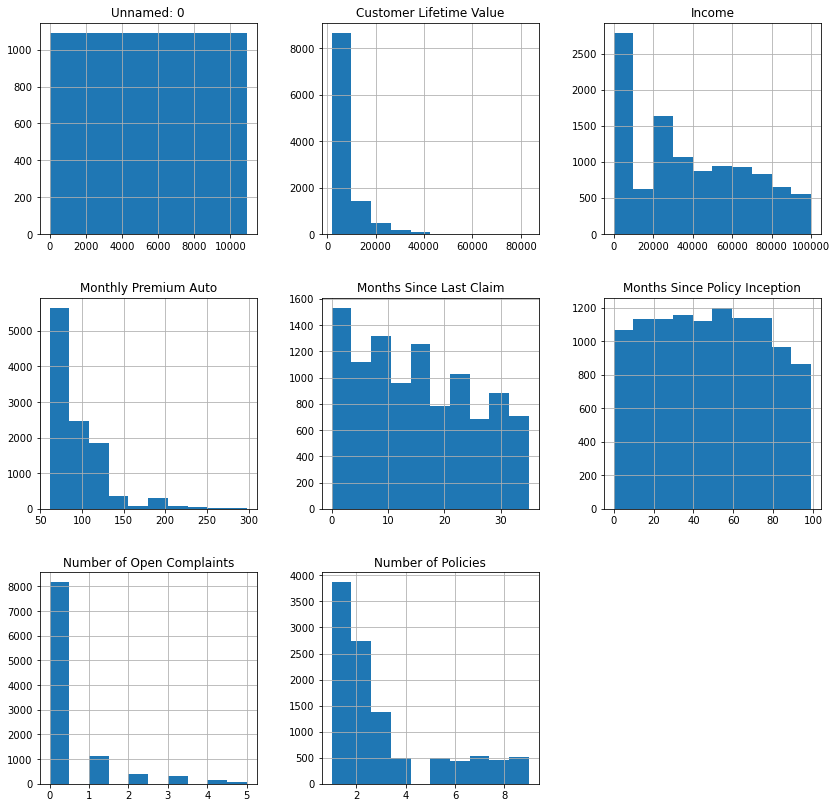

In [24]:
X.hist(figsize=(14,14))

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

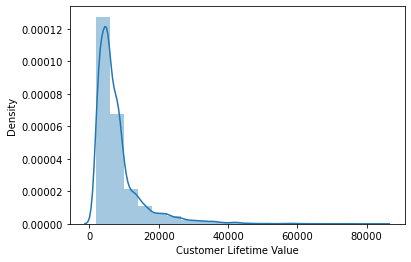

In [25]:
sns.distplot((vehicles_df["Customer Lifetime Value"]), bins=20)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

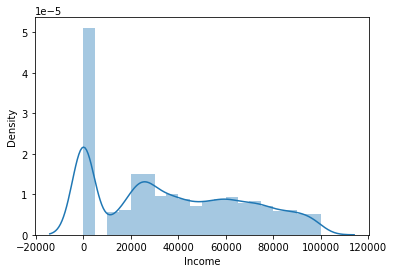

In [26]:
sns.distplot((vehicles_df["Income"]), bins=20)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

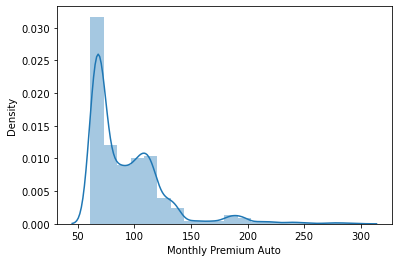

In [27]:
sns.distplot((vehicles_df["Monthly Premium Auto"]), bins=20)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

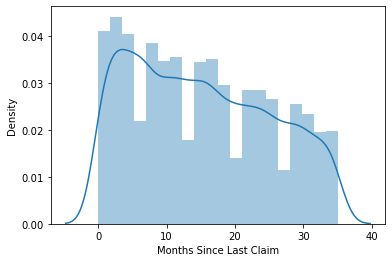

In [28]:
sns.distplot((vehicles_df["Months Since Last Claim"]), bins=20)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Density'>

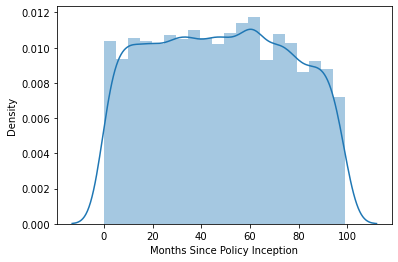

In [29]:
sns.distplot((vehicles_df["Months Since Policy Inception"]), bins=20)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Density'>

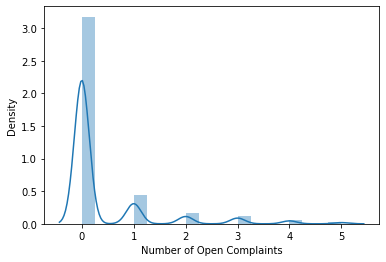

In [30]:
sns.distplot((vehicles_df["Number of Open Complaints"]), bins=20)

/Users/cristina/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Policies', ylabel='Density'>

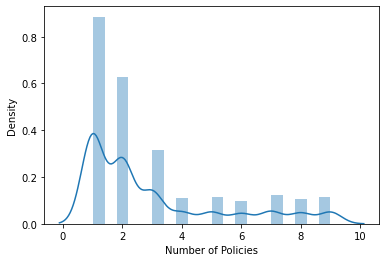

In [31]:
sns.distplot((vehicles_df["Number of Policies"]), bins=20)

In [119]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

ValueError: Found input variables with inconsistent numbers of samples: [21820, 10910]